<a href="https://colab.research.google.com/github/NHU19/test_project/blob/main/6%EC%A3%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B5%EA%B3%BC%EC%A0%9C_LSTM%EC%9D%84_%ED%99%9C%EC%9A%A9%ED%95%9C_%ED%98%84%EB%8C%80%EC%B0%A8_%EC%A3%BC%EA%B0%80%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15, 20)

plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
!pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import FinanceDataReader as fdr

In [6]:
hyundai = fdr.DataReader('005380')

In [7]:
hyundai.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-07-05,180000,181000,173500,177500,1097504,-0.002809
2022-07-06,176000,177000,172000,172500,924184,-0.028169
2022-07-07,175000,177000,172500,175000,536363,0.014493
2022-07-08,177500,180500,177000,178000,824702,0.017143
2022-07-11,180000,182000,179000,180000,455772,0.011236


In [8]:
STOCK_CODE = '005380'

In [9]:
stock = fdr.DataReader(STOCK_CODE)

In [10]:
stock.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1998-05-07,11823,11823,11088,11355,60020,NaN
1998-05-08,11222,11355,11088,11088,57320,-0.023514
1998-05-09,11222,11522,11222,11355,29180,0.024080
1998-05-11,11355,11355,11021,11021,34650,-0.029414
1998-05-12,11155,11222,10687,10687,79080,-0.030306


In [11]:
stock.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-07-05,180000,181000,173500,177500,1097504,-0.002809
2022-07-06,176000,177000,172000,172500,924184,-0.028169
2022-07-07,175000,177000,172500,175000,536363,0.014493
2022-07-08,177500,180500,177000,178000,824702,0.017143
2022-07-11,180000,182000,179000,180000,455772,0.011236


In [12]:
stock.index

DatetimeIndex(['1998-05-07', '1998-05-08', '1998-05-09', '1998-05-11',
               '1998-05-12', '1998-05-13', '1998-05-14', '1998-05-15',
               '1998-05-16', '1998-05-18',
               ...
               '2022-06-28', '2022-06-29', '2022-06-30', '2022-07-01',
               '2022-07-04', '2022-07-05', '2022-07-06', '2022-07-07',
               '2022-07-08', '2022-07-11'],
              dtype='datetime64[ns]', name='Date', length=6000, freq=None)

In [13]:
stock['Year'] = stock.index.year
stock['Month'] = stock.index.month
stock['Day'] = stock.index.day

In [14]:
stock.head()

,Open,High,Low,Close,Volume,Change,Year,Month,Day
Date,,,,,,,,,
1998-05-07,11823,11823,11088,11355,60020,NaN,1998,5,7
1998-05-08,11222,11355,11088,11088,57320,-0.023514,1998,5,8
1998-05-09,11222,11522,11222,11355,29180,0.024080,1998,5,9
1998-05-11,11355,11355,11021,11021,34650,-0.029414,1998,5,11
1998-05-12,11155,11222,10687,10687,79080,-0.030306,1998,5,12


Text(0, 0.5, 'price')

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


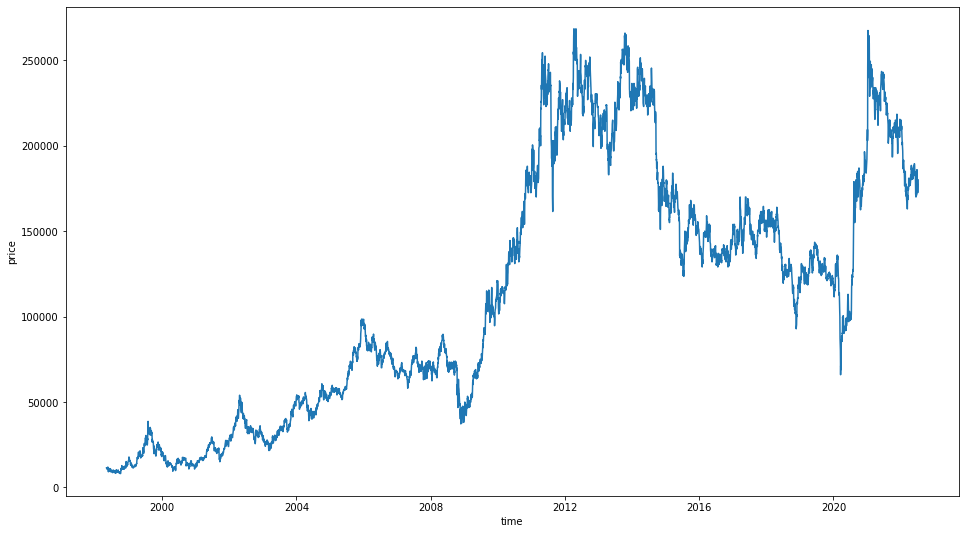

In [15]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=stock['Close'], x=stock.index)
plt.xlabel('time')
plt.ylabel('price')

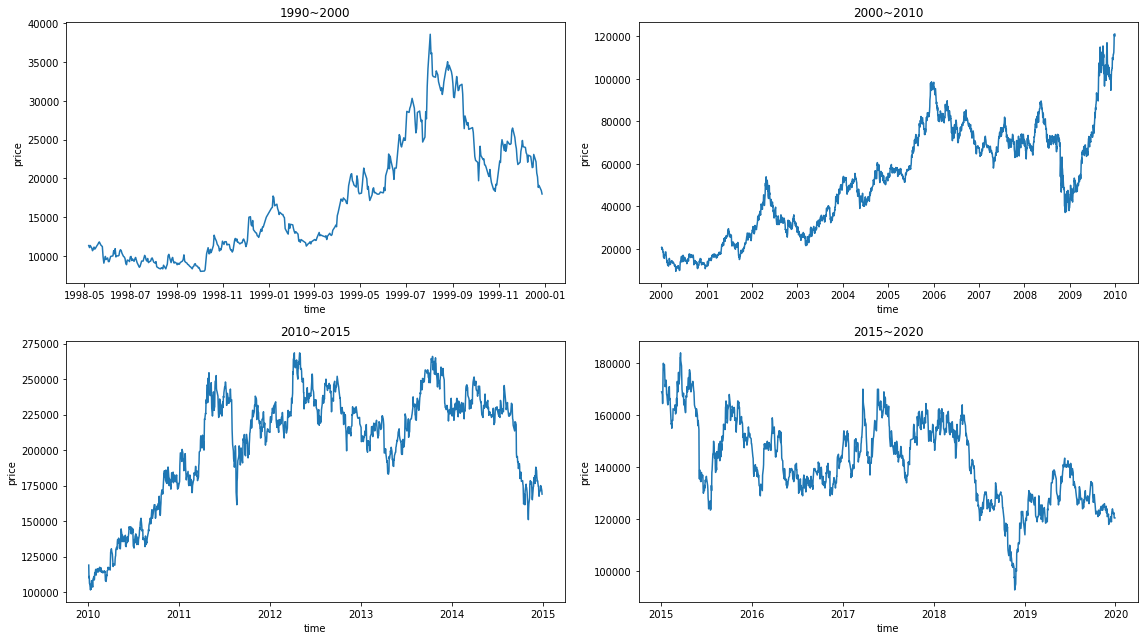

In [17]:
time_steps = [['1990','2000'],
              ['2000','2010'],
              ['2010','2015'],
              ['2015','2020']]

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(16, 9)
for i in range(4):
    ax = axes[i//2, i%2]
    df = stock.loc[(stock.index > time_steps[i][0]) & (stock.index < time_steps[i][1])]
    sns.lineplot(y=df['Close'], x=df.index, ax=ax)
    ax.set_title(f'{time_steps[i][0]}~{time_steps[i][1]}')
    ax.set_xlabel('time')
    ax.set_ylabel('price')
plt.tight_layout()
plt.show()

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume']

scaled = scaler.fit_transform(stock[scale_cols])
scaled

array([[0.01403752, 0.0130149 , 0.01226761, 0.01277676, 0.00208125],
       [0.01175119, 0.01134842, 0.01226761, 0.0117517 , 0.0019804 ],
       [0.01175119, 0.01194308, 0.01278683, 0.01277676, 0.00092932],
       ...,
       [0.6347963 , 0.60118505, 0.63770643, 0.64103765, 0.01987358],
       [0.64430682, 0.61364802, 0.65514302, 0.65255516, 0.0306436 ],
       [0.65381733, 0.61898929, 0.66289261, 0.6602335 , 0.01686335]])

In [19]:
df = pd.DataFrame(scaled, columns=scale_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    6000 non-null   float64
 1   High    6000 non-null   float64
 2   Low     6000 non-null   float64
 3   Close   6000 non-null   float64
 4   Volume  6000 non-null   float64
dtypes: float64(5)
memory usage: 234.5 KB


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Close', 1), df['Close'], test_size=0.2, random_state=0, shuffle=False)

In [22]:
x_train.shape, y_train.shape

((4800, 4), (4800,))

In [23]:
x_test.shape, y_test.shape

((1200, 4), (1200,))

In [24]:
x_train

,Open,High,Low,Volume
0,0.014038,0.013015,0.012268,0.002081
1,0.011751,0.011348,0.012268,0.001980
2,0.011751,0.011943,0.012787,0.000929
3,0.012257,0.011348,0.012008,0.001134
4,0.011496,0.010875,0.010714,0.002793
...,...,...,...,...
4795,0.511160,0.490799,0.519525,0.011787
4796,0.520670,0.490799,0.523400,0.015421
4797,0.513062,0.485457,0.517588,0.009207
4798,0.516866,0.489018,0.525337,0.009303


In [25]:
import tensorflow as tf

In [26]:
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

In [27]:
WINDOW_SIZE=20
BATCH_SIZE=32

In [28]:
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [29]:
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 20, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32, 1)


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model = Sequential([
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

In [31]:
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [32]:
earlystopping = EarlyStopping(monitor='val_loss', patience=10)

filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [33]:
history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=50, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/50
    150/Unknown - 6s 23ms/step - loss: 2.8111e-04 - mse: 5.6222e-04
Epoch 1: val_loss improved from inf to 0.00041, saving model to tmp/ckeckpointer.ckpt
150/150 [==============================] - 10s 49ms/step - loss: 2.8111e-04 - mse: 5.6222e-04 - val_loss: 4.0706e-04 - val_mse: 8.1412e-04
Epoch 2/50
150/150 [==============================] - ETA: 0s - loss: 1.8325e-04 - mse: 3.6650e-04
Epoch 2: val_loss improved from 0.00041 to 0.00034, saving model to tmp/ckeckpointer.ckpt
150/150 [==============================] - 4s 28ms/step - loss: 1.8325e-04 - mse: 3.6650e-04 - val_loss: 3.3716e-04 - val_mse: 6.7433e-04
Epoch 3/50
150/150 [==============================] - ETA: 0s - loss: 1.7415e-04 - mse: 3.4831e-04
Epoch 3: val_loss did not improve from 0.00034
150/150 [==============================] - 5s 30ms/step - loss: 1.7415e-04 - mse: 3.4831e-04 - val_loss: 5.2154e-04 - val_mse: 0.0010
Epoch 4/50
147/150 [============================>.] - ETA: 0s - loss: 1.6599e-04 - mse: 3

In [34]:
model.load_weights(filename)

In [35]:
pred = model.predict(test_data)

In [36]:
pred.shape

(1180, 1)

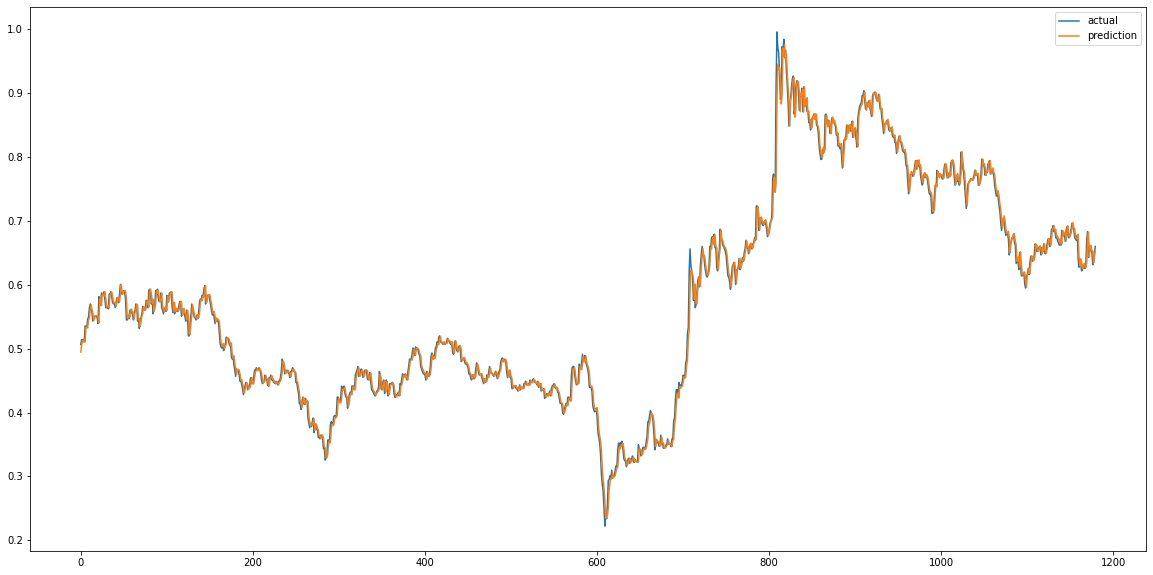

In [37]:
plt.figure(figsize=(20, 10))
plt.plot(np.asarray(y_test)[20:], label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()